# Displaying the GPU Utilized for computation

In [ ]:
#--------------------- Google Colab Code ------------------------------------
#Source: https://colab.research.google.com/notebooks/gpu.ipynb#scrollTo=tMce8muBqXQP

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

# Tensorflow with GPU
%tensorflow_version 2.x
import tensorflow as tf
import timeit

# Enabling and testing the GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

# Observe TensorFlow speedup on GPU relative to CPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)

# knowing the gpu name
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
#print(gpu_info)

# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print('\nThis colab notebook is using a gpu that is {}x faster than the cpu for computing this neural network model'.format(int(cpu_time/gpu_time)))

Sat Dec  5 01:57:23 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    40W / 300W |  15619MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Importing Relevant Python Libraries

In [ ]:
#Imported pandas library because it contains a built in function called read_csv() which loads the dataset into a dataframe
#For loading data
import pandas as pd

#For analyzing data
import numpy as np

#For visualizing data
import seaborn as sns
import matplotlib.pyplot as plt

!pip install pandas==0.25.3
!pip install numpy==1.17.4
!pip install seaborn==0.9.0
print('Pandas Version Downloaded/Imported for Usage in this Notebook: V {}'.format(pd.__version__))
print('Numpy Version Downloaded/Imported for Usage in this Notebook: V {}'.format(np.__version__))
print('Seaborn Version Downloaded/Imported for Usage in this Notebook: V {}'.format(sns.__version__))

Pandas Version Downloaded/Imported for Usage in this Notebook: V 1.1.4
Numpy Version Downloaded/Imported for Usage in this Notebook: V 1.18.5
Seaborn Version Downloaded/Imported for Usage in this Notebook: V 0.11.0


#Changing the current working directory to point to the google drive stored project folder

In [ ]:
#--------------------- Google Colab Code ------------------------------------
#Mounted the google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [ ]:
import os
#specifying the file path to the gdrive folder containing this colab notebook & the raw data 
os.chdir('/content/drive/My Drive/SEIS_764_Group_Project/BigCat')

In [ ]:
os.getcwd() # finding the current working directory

'/content/drive/.shortcut-targets-by-id/1Fz_TNyhsvVwZFl4QgDlrt_ileWYOq-P_/SEIS_764_Group_Project/BigCat/TL'

In [ ]:
!ls -la #viewing the content of the current working directory

total 2529481
-rw------- 1 root root     345394 Dec  1 00:58 '764 Proposal.docx'
-rw------- 1 root root    5064044 Dec  4 16:20  AI_Project_Presentation.docx
-rw------- 1 root root   22022648 Dec  3 05:23 'AI_Project Presentation.pptx'
-rw------- 1 root root 1167033976 Dec  2 02:37  Moen_tl_model.h5
drwx------ 2 root root       4096 Nov 29 19:45  RawData
-rw------- 1 root root 1302857304 Dec  5 00:31  ResNet50_tl_model.h5
-rw------- 1 root root       5301 Dec  4 05:15  scratch_cnn_v3.ipynb
-rw------- 1 root root      42703 Dec  1 01:11  SerengetiStats.xlsx
-rw------- 1 root root     318873 Dec  4 01:27  TL_Model_Functional_Train.ipynb
-rw------- 1 root root     310588 Dec  3 04:37  TL_Model.ipynb
-rw------- 1 root root     289756 Dec  4 01:27  TL_Model_Keras_Train.ipynb
-rw------- 1 root root      96535 Dec  5 01:56  TL_Model_Sequential_Test.ipynb
-rw------- 1 root root      86325 Dec  5 01:39  TL_Model_Sequential_Train.ipynb
-rw------- 1 root root   91370064 Dec  5 01:39  trained_tl_m

# Building the Transfer Learning Model (Using VGG16 as the base pretrained model)

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout,GlobalAveragePooling2D
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
#----------------------------------------TL MODEL 1st Build ---------------------------------------#
# adding a preprocessing layer to the front of VGG
#pretrained_Vgg16_Model = VGG16(input_shape=(361,512,3), weights='imagenet', include_top=False)

# don't train existing weights (setting non trainable parameters)
#for layers in pretrained_Vgg16_Model.layers:
  #layers.trainable = False
  
# useful for getting number of classes
#num_classes = glob('RawData/train/*')

#------------------------------Model Building -------------------------# 
#model building- input layer
#X=Flatten()(pretrained_Vgg16_Model.layers.output)

#model building- Bottleneck structure for hidden layers
#fc1=Dense(128, activation='relu')(X)
#h1=Dense(128, activation='relu')(fc1)
#d1=Dropout(0.2)(h1)
#h2=Dense(128, activation='relu')(d1)
#d2=Dropout(0.2)(h2)
#h3=Dense(64, activation='relu')(d2)

#model building- classification layer
#y_predicted = Dense(len(num_classes), activation='softmax')(h3)
#------------------------------------------------------------------------# 

# create a transfer learning cnn model based off of the pretrained cnn model
#transferLearning_CNN_Model = Model(inputs=pretrained_Vgg16_Model.input, outputs=y_predicted)

# view the structure of the model
#transferLearning_CNN_Model.summary()

In [ ]:
num_classes = len(glob('RawData/train/*'))
print(num_classes)

5


In [ ]:
#----------------------------------------TL MODEL 2nd Build ---------------------------------------#
#SOURCE:https://keras.io/guides/transfer_learning/

#1st, we create a base model using pretrained weights
#base_model=VGG16(input_shape=(361,512,3), weights='imagenet', include_top=False)

#2nd, we freeze all the layers of the base layers
#for baseModelLayers in base_model.layers:
    #baseModelLayers.trainable=False

#3rd, we create a new model on top of the base model
#inputs = Input(shape=(361,512,3))
#x = base_model(inputs, training=False) #letting base model run in inference mode by setting training=False
#x = GlobalAveragePooling2D()(x) #converting features of share into vectors
#x= Dropout(0.2)(x)  #dropout causes higher validation accuracy than training accuracy
#outputs=Dense(len(num_classes))(x)
#transferLearning_CNN_Model=Model(inputs,outputs)

# view the structure of the model
#transferLearning_CNN_Model .summary()

In [ ]:
#----------------------------------------TL MODEL 3rd Build ---------------------------------------#
#SOURCE:https://github.com/keras-team/keras/issues/1597
#1st, we create a base model using pretrained weights (base model is the feature extractor)
base_model=VGG16(input_shape=(361,512,3), weights='imagenet', include_top=False)

#2nd, we freeze all the layers of the base layers
for baseModelLayers in base_model.layers:
  baseModelLayers.trainable=False

#used a cnn model on top of the base model VGG16
transferLearning_CNN_Model =Sequential()
transferLearning_CNN_Model.add(base_model)
transferLearning_CNN_Model.add(Flatten())
transferLearning_CNN_Model.add(Dropout(0.4)) #model was getting accuracy of 1.0 so updated dropout from 0.2 to 0.5
transferLearning_CNN_Model.add(Dense(30, activation='relu'))
transferLearning_CNN_Model.add(Dense(num_classes, activation='softmax'))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 11, 16, 512)       14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 90112)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 90112)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                2703390   
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 155       
Total params: 17,418,233
Trainable params: 2,703,545
Non-trainable params: 14,714,688
_________________________________________________________________


# Printing the models layers

In [ ]:
# view the structure of the model
transferLearning_CNN_Model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 11, 16, 512)       14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 90112)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 90112)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                2703390   
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 155       
Total params: 17,418,233
Trainable params: 2,703,545
Non-trainable params: 14,714,688
_________________________________________________________________


# Compiling the Transfer Learning Model

In [ ]:
# tell the model what cost and optimization method to use
transferLearning_CNN_Model .compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

#Loading the training data & the val data (Stored in the project folder on google drive)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

generatedData = ImageDataGenerator(rescale = 1.0/255.0)

#populating the training_set by getting images from Raw Data >train
training_set = generatedData.flow_from_directory('/content/drive/My Drive/SEIS_764_Group_Project/BigCat/RawData/train',
                                                 batch_size = 75,
                                                 seed=1,
                                                 target_size=(361,512), #target_size=input image size
                                                 shuffle=True, #images are fed to the model in a different order every epoch
                                                 class_mode = 'categorical')

#populating the test_set by getting images from Raw Data >val
val_set = generatedData.flow_from_directory('/content/drive/My Drive/SEIS_764_Group_Project/BigCat/RawData/val',
                                            batch_size = 75,
                                            seed=1,
                                            target_size=(361,512), #target_size=input image size
                                            shuffle=True, #images are fed to the model in a different order every epoch
                                            class_mode = 'categorical')

#--------------TESTING DATA IS RESERVED FOR PREDICTING THE TL MODEL------------------------------#

Found 5718 images belonging to 5 classes.
Found 713 images belonging to 5 classes.


In [ ]:
batch_size=75 #hyperparameter to tune(change and rerun the models training) in order to avoid overfitting the transfer learning neural network model

In [ ]:
#viewing the output of the training data generator
print("batch size = {}, # of batches generated = {}, training data = {} images".format(batch_size,len(training_set),training_set.n))
print("")

batchesProcessed = 0

print("\nVerifying that the training_set data generator works by displaying some of the batches for the training data")

for X_train_batch, y_train_batch in training_set: #32,64...........4080 (for loop runs 256 times which is len(training_set))
    print('X_train_batch Size:', X_train_batch.shape)
    print('y_train_batch:', y_train_batch.shape)
    
    batchesProcessed =batchesProcessed + 1
    print("Processed Batch#: ", batchesProcessed)
    if(batchesProcessed ==2):
      break

batch size = 75, # of batches generated = 77, training data = 5718 images


Verifying that the training_set data generator works by displaying some of the batches for the training data
X_train_batch Size: (75, 361, 512, 3)
y_train_batch: (75, 5)
Processed Batch#:  1
X_train_batch Size: (75, 361, 512, 3)
y_train_batch: (75, 5)
Processed Batch#:  2


In [ ]:
#viewing the output of the test data generator 
print("batch size = {}, # of batches generated = {}, validation data = {} images".format(batch_size,len(val_set),val_set.n))
print("")

batchesProcessed = 0

print("\nVerifying that the val_set data generator works by displaying some of the batches for the validation data")

for X_val_batch, y_val_batch in val_set: #32,64.............1017 (for loop runs 33 times which is len(test_set))
    print('X_val_batch Size:', X_val_batch.shape)
    print('y_test_batch:', y_val_batch.shape)

    batchesProcessed =batchesProcessed + 1
    print("Processed Batch#: ", batchesProcessed)
    if(batchesProcessed ==2):
      break

batch size = 75, # of batches generated = 10, validation data = 713 images


Verifying that the val_set data generator works by displaying some of the batches for the validation data
X_val_batch Size: (75, 361, 512, 3)
y_test_batch: (75, 5)
Processed Batch#:  1
X_val_batch Size: (75, 361, 512, 3)
y_test_batch: (75, 5)
Processed Batch#:  2


# Training the Model (used training data + validation data)

In [ ]:
#Val data is used for training the model because it gives us val_accuracy and val-Loss which compared against train_loss and train_accuracy tells us if the model is overfitting or not)

# fit() lets us fit the model onto the data using the generator
trained_TL_Model = transferLearning_CNN_Model.fit(
  training_set, #fitting on the training data
  validation_data=val_set,  #testing against the val data
  epochs=32,
  steps_per_epoch=training_set.n/batch_size, #4118 images and batch size of 32 means it will take 129 batches for the model to see 4118 images
  validation_steps=val_set.n/batch_size, #513 images and batch size of 32 means it will take 17 batches for the model to see 513 images
  )

Epoch 1/32
77/76 [==============================] - 50s 650ms/step - loss: 1.7599 - accuracy: 0.3061 - val_loss: 1.1893 - val_accuracy: 0.2468
Epoch 2/32
77/76 [==============================] - 50s 643ms/step - loss: 1.0368 - accuracy: 0.4057 - val_loss: 0.8745 - val_accuracy: 0.4628
Epoch 3/32
77/76 [==============================] - 50s 649ms/step - loss: 0.7831 - accuracy: 0.6780 - val_loss: 0.6984 - val_accuracy: 0.7574
Epoch 4/32
77/76 [==============================] - 50s 649ms/step - loss: 0.6146 - accuracy: 0.7947 - val_loss: 0.5953 - val_accuracy: 0.7854
Epoch 5/32
77/76 [==============================] - 50s 651ms/step - loss: 0.5300 - accuracy: 0.8113 - val_loss: 0.5503 - val_accuracy: 0.8121
Epoch 6/32
77/76 [==============================] - 50s 655ms/step - loss: 0.4954 - accuracy: 0.8199 - val_loss: 0.5075 - val_accuracy: 0.8050
Epoch 7/32
77/76 [==============================] - 50s 645ms/step - loss: 0.4400 - accuracy: 0.8340 - val_loss: 0.4725 - val_accuracy: 0.8261

# Checking the models fit (underfit or overfit)

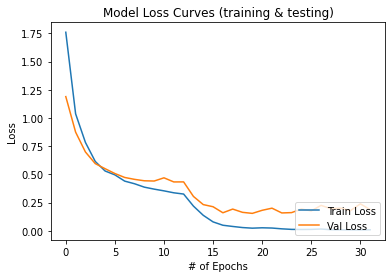

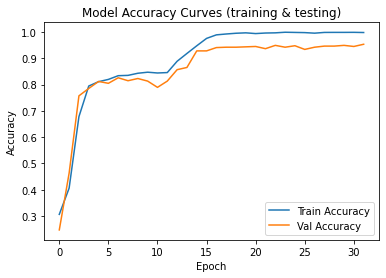

In [ ]:
#plot training & validation loss values
plt.plot(trained_TL_Model.history['loss'])
plt.plot(trained_TL_Model.history['val_loss'])
plt.title('Model Loss Curves (training & testing)')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.legend(['Train Loss','Val Loss'], loc='lower right')
plt.show() # OVERFITTING MODEL (training loss decreases and test loss increases)

#plot training & validation accuracy values
plt.plot(trained_TL_Model.history['accuracy'])
plt.plot(trained_TL_Model.history['val_accuracy'])
plt.title('Model Accuracy Curves (training & testing)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy','Val Accuracy'], loc='lower right')
plt.show()

# Validating the Model (for all of the validation data)

In [ ]:
len(val_set)

10

# Saving the trained transfer learning model (to reuse for testing or retraining the model)

In [ ]:
#------------- We save the model after training (saves the architecture, weights, compilation state, optimization state)
transferLearning_CNN_Model.save('/content/drive/My Drive/SEIS_764_Group_Project/BigCat/TL/trained_tl_model.h5')

In [ ]:
#----------------------------------------------------CODE FOR RETRAINING THE SAVED MODEL 

#-------------1st, We adding more images into the raw data folders training and testing subfolders

#----------2nd, We load back the saved model & resume model training----------------------------
#-->Loading the model back prevents keras models weights from resetting everytime you rerun the notebook

#from keras import models    
#reconstructed_TL_CNN_Model= models.load_model('/content/drive/My Drive/SEIS_764_Group_Project/TL/trained_tl_model.h5')

#-->The reconstructed model has retained its compilation and optimizer states therefore
#--> we can directly resume training without having to rebuild and recompile the r econstructed model
#retrained_TL_Model = reconstructed_TL_CNN_Model.fit(
  #training_set, #fitting on the training data
  #validation_data=val_set,  #testing against the val data
  #epochs=16,
  #steps_per_epoch=training_set.n/batch_size, #4118 images and batch size of 32 means it will take 129 batches for the model to see 4118 images
 # validation_steps=val_set.n/batch_size, #513 images and batch size of 32 means it will take 17 batches for the model to see 513 images
#  )